
# import

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

# データの取得

In [16]:
data = load_wine()

# データの確認

In [17]:
data.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [18]:
data["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

# 特徴量の確認
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10)Color intensity
11)Hue
12)OD280/OD315 of diluted wines
13)Proline

DeepL による翻訳結果


1）アルコール
2）リンゴ酸
3)灰
4)灰のアルコール度
5) マグネシウム
6) 総フェノール類
7) フラバノイド
8) ノンフラバノイドフェノール
9) プロアントシアニン
10）色の強度
11)色相
12)希釈ワインのOD280/OD315
13)プロリン

# ラベルの確認
0, 1, 2 のカテゴリ変数（質的変数）

http://archive.ics.uci.edu/ml/datasets/Wine UCI を見ても特に書いてない・・・

# 頑張って仮説を立ててみる
あまりよくわからないデータに対して考察を行うことにどれくらい意味があるかは怪しいですが
とりあえず，イタリア産で化学的な特徴量に基づいて分類する設定だということです

アルコール，リンゴ酸（酸味），マグネシウム，色の強度，色相くらいならわかりそうなので
アルコールやリンゴ酸とぶどうが関連していたら嬉しいなくらいの気持ちでいきます

また，全部が数値であり，量的変数であることもわかります．

In [19]:
X, Y = data["data"], data["target"]

In [20]:
wine_df = pd.DataFrame(data["data"], columns=data["feature_names"])
wine_df = pd.concat([wine_df, pd.DataFrame(data["target"], columns=["target"])], axis=1)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# 箱ひげ図

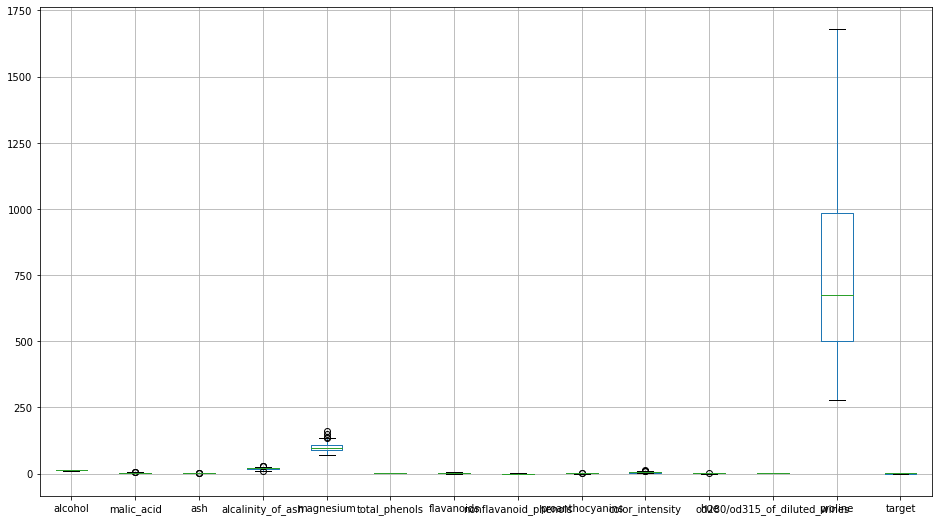

In [8]:
#一部が大きすぎて見えない・・・
wine_df.boxplot(figsize=(16,9))

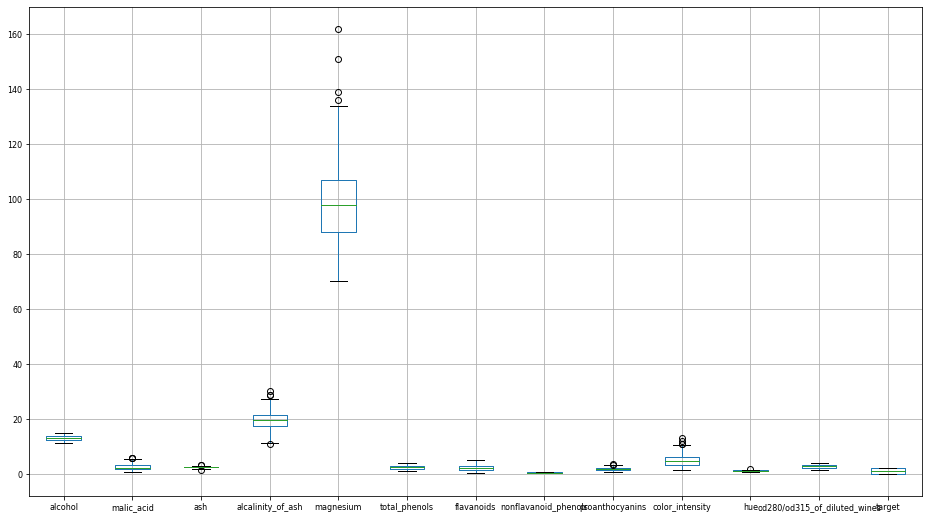

In [9]:
# 邪魔な proline を無視します
wine_df[[c for c in wine_df.columns if c != "proline"]].boxplot(figsize=(16,9), fontsize=8)

# scale が揃っていないのが気になるので正規化

In [0]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [11]:
wine_df = pd.DataFrame(min_max_scaler.fit_transform(data["data"]), columns=data["feature_names"])
wine_df = pd.concat([wine_df, pd.DataFrame(data["target"], columns=["target"])], axis=1)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0


In [12]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.938202
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.775035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,1.000000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


# 箱ひげ図

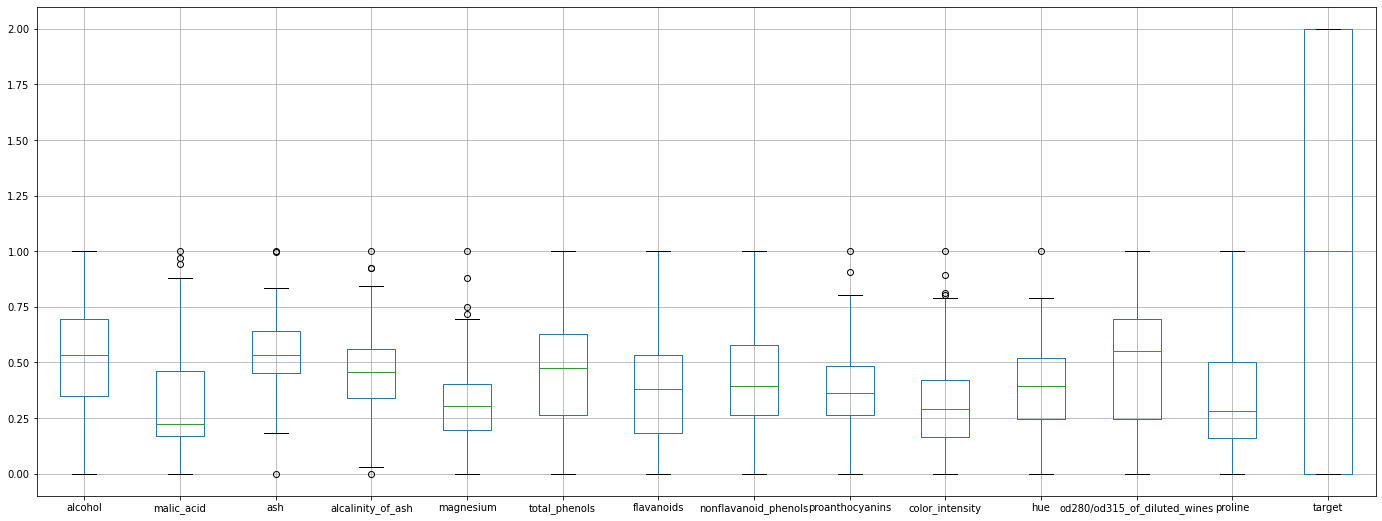

In [13]:
wine_df.boxplot(figsize=(24,9))

# 相関を見たい！
ですが。。。カテゴリ変数（質的変数）なのでターゲットとの相関係数はあまり意味がありません


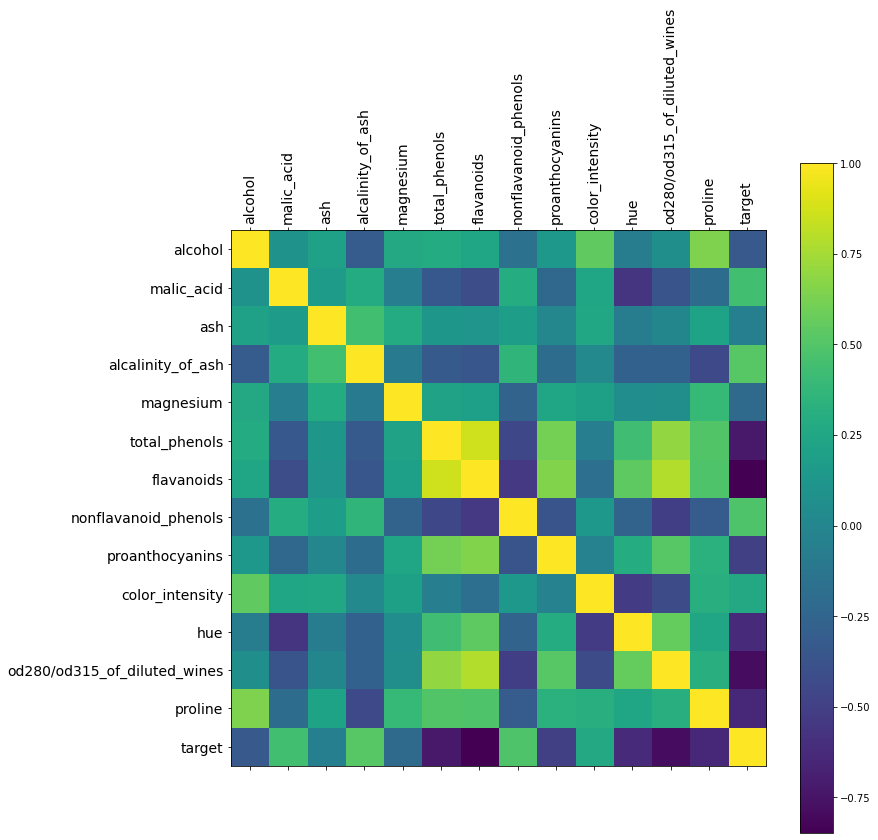

In [14]:
fig = plt.figure(figsize=(12, 12))
plt.matshow(wine_df.corr("pearson"), fignum=fig.number)
plt.xticks(range(wine_df.shape[1]), wine_df.columns, fontsize=14, rotation=90)
plt.yticks(range(wine_df.shape[1]), wine_df.columns, fontsize=14)
plt.colorbar()

In [15]:
# どういう組み合わせで相関が大きいか見ておきましょう（0.4はなんとなくです．根拠はありません）
corr = wine_df.corr().values
[[wine_df.columns[i], wine_df.columns[j], corr[i][j]] for i in range(wine_df.shape[1]-1) for j in range(wine_df.shape[1]-1) if abs(corr[i][j]) >= 0.4 and corr[i][j] != 1]

[['alcohol', 'color_intensity', 0.5463641950837038],
 ['alcohol', 'proline', 0.6437200371782134],
 ['malic_acid', 'flavanoids', -0.41100658761426334],
 ['malic_acid', 'hue', -0.5612956886649447],
 ['ash', 'alcalinity_of_ash', 0.44336718655231094],
 ['alcalinity_of_ash', 'ash', 0.44336718655231094],
 ['alcalinity_of_ash', 'proline', -0.44059693128216226],
 ['total_phenols', 'flavanoids', 0.8645635000951144],
 ['total_phenols', 'nonflavanoid_phenols', -0.44993530093521983],
 ['total_phenols', 'proanthocyanins', 0.612413083780036],
 ['total_phenols', 'hue', 0.43368133521377555],
 ['total_phenols', 'od280/od315_of_diluted_wines', 0.6999493647911859],
 ['total_phenols', 'proline', 0.4981148796420981],
 ['flavanoids', 'malic_acid', -0.41100658761426334],
 ['flavanoids', 'total_phenols', 0.8645635000951144],
 ['flavanoids', 'nonflavanoid_phenols', -0.5378996119051981],
 ['flavanoids', 'proanthocyanins', 0.6526917686075157],
 ['flavanoids', 'hue', 0.5434785664899897],
 ['flavanoids', 'od280/od

> アルコール，リンゴ酸（酸味），マグネシウム，色の強度，色相くらいならわかりそうなので
> アルコールやリンゴ酸とぶどうが関連していたら嬉しいなくらいの気持ちでいきます

としていたので，関連項目を見ると
['alcohol', 'color_intensity'], ['color_intensity', 'alcohol'],
 ['color_intensity', 'hue'],['hue', 'color_intensity'],
 となっているので，色とアルコールは相関が高いので，類似した性質があるかもですね
若干，リンゴ酸にも同じ傾向が見えます．

['total_phenols', 'flavanoids'] あたりも類似した性質があるかもです

 一方で，マグネシウムは他のものとは類似した性質を持ってなさそうです

# ターゲットのカテゴリをダミー変数に
target == 0 のみを持つ列，target == 1 のみを持つ列，target == 2 のみを持つ列を作成

In [16]:
wine_df_dummy = pd.concat([wine_df, pd.get_dummies(wine_df["target"], prefix="target_")], axis=1)
wine_df_dummy.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target__0,target__1,target__2
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0,1,0,0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0,1,0,0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0,1,0,0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0,1,0,0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0,1,0,0


2値分類にしたため，ターゲットの相関に意味があってもおかしくありません．

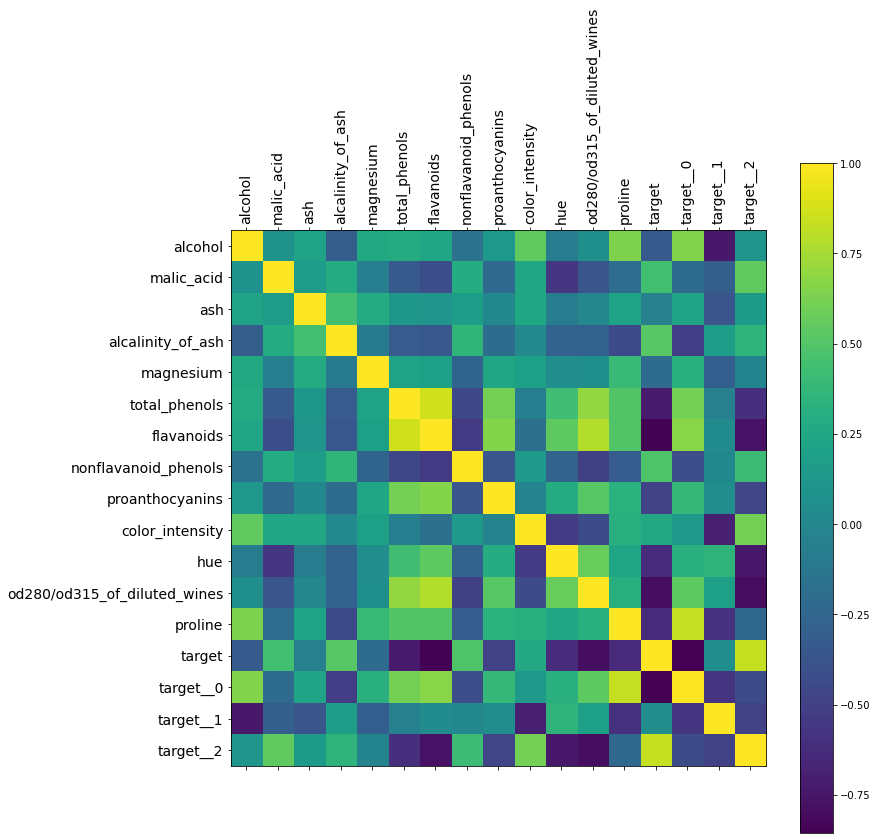

In [17]:
fig = plt.figure(figsize=(12, 12))
plt.matshow(wine_df_dummy.corr("pearson"), fignum=fig.number)
plt.xticks(range(wine_df_dummy.shape[1]), wine_df_dummy.columns, fontsize=14, rotation=90)
plt.yticks(range(wine_df_dummy.shape[1]), wine_df_dummy.columns, fontsize=14)
plt.colorbar()

In [18]:
# どういう組み合わせで相関が大きいのか見ておきましょう
corr = wine_df_dummy.corr().values
[[wine_df_dummy.columns[i], wine_df_dummy.columns[j], corr[i][j]] for i in range(wine_df.shape[1], wine_df_dummy.shape[1]) for j in range(wine_df_dummy.shape[1]) if abs(corr[i][j]) >= 0.4 and corr[i][j] != 1]

[['target__0', 'alcohol', 0.6472322816284557],
 ['target__0', 'alcalinity_of_ash', -0.5196455243908183],
 ['target__0', 'total_phenols', 0.6149600953497655],
 ['target__0', 'flavanoids', 0.6737701693832151],
 ['target__0', 'nonflavanoid_phenols', -0.40768044259823844],
 ['target__0', 'od280/od315_of_diluted_wines', 0.5431308803730069],
 ['target__0', 'proline', 0.8270004510913332],
 ['target__0', 'target', -0.8547735051992134],
 ['target__0', 'target__1', -0.5735744675578627],
 ['target__0', 'target__2', -0.42785978407499275],
 ['target__1', 'alcohol', -0.7263831781569264],
 ['target__1', 'color_intensity', -0.6946785254945604],
 ['target__1', 'proline', -0.5898503204104634],
 ['target__1', 'target__0', -0.5735744675578627],
 ['target__1', 'target__2', -0.49497837784725995],
 ['target__2', 'malic_acid', 0.5440420087312747],
 ['target__2', 'total_phenols', -0.6001190805142718],
 ['target__2', 'flavanoids', -0.7612322601327902],
 ['target__2', 'nonflavanoid_phenols', 0.4193466514375121],

['target__0', 'proline', 0.8270004510913332],
['target__2', 'od280/od315_of_diluted_wines', -0.7965903664356595],
辺りが大きいでしょうか？

アルコールもなかなかです．
['target__0', 'alcohol', 0.6472322816284557],
['target__1', 'alcohol', -0.7263831781569264],

# 質的変数と量的変数の相関を測るのに，相関比（correlation ratio）を利用
https://toukeigaku-jouhou.info/2018/08/17/correlation-ratio/ を参照．
すいません，良さそうな引用先が見つからず・・・

In [0]:
def correlation_ratio(X, Y):
    c = 0
    for i in range(np.min(Y), np.max(Y)+1):
        x = X[Y == i]
        c += np.var(x)*len(x)
    return 1-c/(np.var(X)*len(X))

In [20]:
[[wine_df.columns[i], "target", correlation_ratio(wine_df[wine_df.columns[i]], wine_df["target"])] for i in range(wine_df.shape[1]-1)]

[['alcohol', 'target', 0.606878722433705],
 ['malic_acid', 'target', 0.2968692397699061],
 ['ash', 'target', 0.13205553100372658],
 ['alcalinity_of_ash', 'target', 0.2901854648779746],
 ['magnesium', 'target', 0.12438342879611763],
 ['total_phenols', 'target', 0.5171961212624121],
 ['flavanoids', 'target', 0.7277754921530848],
 ['nonflavanoid_phenols', 'target', 0.23962908699908125],
 ['proanthocyanins', 'target', 0.2570351332842302],
 ['color_intensity', 'target', 0.5796583835414437],
 ['hue', 'target', 0.5365878346831898],
 ['od280/od315_of_diluted_wines', 'target', 0.6846532302124797],
 ['proline', 'target', 0.7038118974523616]]

先ほどと同じスケーリングではないことに注意すべきですが

alcohol, flavanoids, od280/od315_of_diluted_wines, proline あたりが良さそうなのは先ほどと同じかも

# 回帰分析
['alcohol', 'proline', 0.6437200371782134]，
['proline', 'flavanoids', 0.49419312720437414]]の相関が大きかったので，関係を眺めておきます．

In [0]:
# 線形モデル
from sklearn import linear_model

In [22]:
clf = linear_model.LinearRegression()
X = wine_df["proline"].values.reshape(-1, 1)
Y = wine_df["flavanoids"]
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# 傾き，切片，相関係数の2乗
clf.coef_, clf.intercept_, clf.score(X, Y) 

(array([0.463647]), 0.20132113112770558, 0.24422684697603847)

Text(0, 0.5, 'flavanoids')

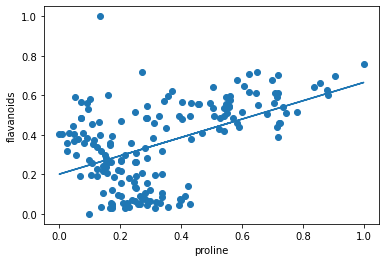

In [24]:
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("proline")
plt.ylabel("flavanoids")

Text(0, 0.5, 'alcohol')

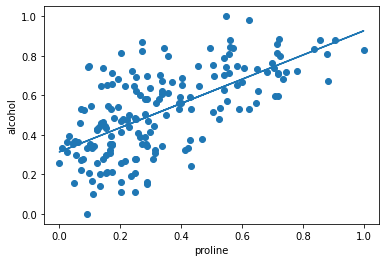

In [25]:
clf = linear_model.LinearRegression()
X = wine_df["proline"].values.reshape(-1, 1)
Y = wine_df["alcohol"]
clf.fit(X, Y)
# 傾き，切片，相関係数の2乗
clf.coef_, clf.intercept_, clf.score(X, Y) 
plt.plot(X, clf.coef_ * X + clf.intercept_)
plt.scatter(X, Y)
plt.xlabel("proline")
plt.ylabel("alcohol")

確かに，alcohol と proline の方が相関がありそうです．

# モデルの学習
試しにモデルを学習し，予測精度を測ってみます．

データを分割し，学習用データと評価用データを作成します．

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(wine_df[data["feature_names"]], wine_df["target"], test_size=0.33, random_state=1)

In [28]:
X_train.shape, X_test.shape

((119, 13), (59, 13))

# SVM

In [0]:
from sklearn.svm import SVC

In [30]:
# 訓練
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [31]:
# 予測
pred = clf.predict(X_test)
pred

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2])

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
# 評価
# accuracy　正答率, precision　適合率, recall　再現率, f値
accuracy_score(pred, y_test), precision_score(pred, y_test, average=None), \
recall_score(pred, y_test, average=None), f1_score(pred, y_test, average=None)

(0.9830508474576272,
 array([1.        , 1.        , 0.92307692]),
 array([1.        , 0.95652174, 1.        ]),
 array([1.        , 0.97777778, 0.96      ]))

怖いくらい当たっていますね・・・検証について考えるのはまた今度にします．

# 決定木

In [0]:
from sklearn import tree

In [35]:
#訓練
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
#予測
pred = clf.predict(X_test)

In [37]:
# 評価
# accuracy　正答率, precision　適合率, recall　再現率, f値
accuracy_score(pred, y_test), precision_score(pred, y_test, average=None), \
recall_score(pred, y_test, average=None), f1_score(pred, y_test, average=None)

(0.9322033898305084,
 array([0.95833333, 0.86363636, 1.        ]),
 array([0.92      , 0.95      , 0.92857143]),
 array([0.93877551, 0.9047619 , 0.96296296]))

[Text(334.79999999999995, 440.31600000000003, 'flavanoids <= 0.134\ngini = 0.657\nsamples = 119\nvalue = [35, 49, 35]\nclass = 1'),
 Text(223.2, 342.468, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]\nclass = 2'),
 Text(446.4, 342.468, 'proline <= 0.344\ngini = 0.548\nsamples = 90\nvalue = [35, 49, 6]\nclass = 1'),
 Text(223.2, 244.62, 'od280/od315_of_diluted_wines <= 0.086\ngini = 0.23\nsamples = 54\nvalue = [1, 47, 6]\nclass = 1'),
 Text(111.6, 146.772, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = 2'),
 Text(334.79999999999995, 146.772, 'hue <= 0.126\ngini = 0.079\nsamples = 49\nvalue = [1, 47, 1]\nclass = 1'),
 Text(223.2, 48.924000000000035, '\n  (...)  \n'),
 Text(446.4, 48.924000000000035, '\n  (...)  \n'),
 Text(669.5999999999999, 244.62, 'flavanoids <= 0.385\ngini = 0.105\nsamples = 36\nvalue = [34, 2, 0]\nclass = 0'),
 Text(558.0, 146.772, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 1'),
 Text(781.1999999999999, 146.772, 'gini = 0.0\nsamples = 34\nvalue = [34,

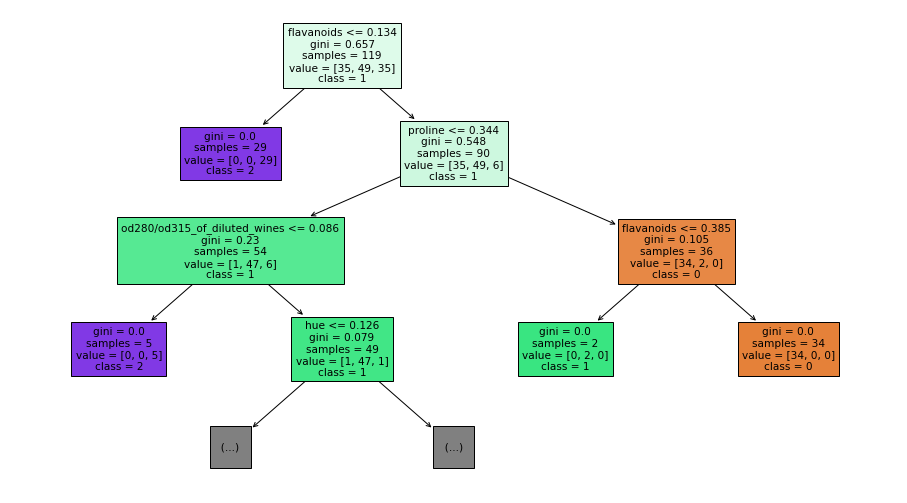

In [38]:
# 可視化
plt.figure(figsize=(16, 9))
tree.plot_tree(clf, feature_names=data["feature_names"], class_names=["0", "1", "2"],
               filled=True, max_depth=3) 

 # 最後に
 最初は，alcohol や色合いから決まってくれると助かると思いましたが
 途中で相関を計算した時に，flavanoids, od280/od315_of_diluted_wines, proline あたりが良さそうだとなっていました．

 決定木の分類ではまさしくその通りの結果になってます．

 flavanoids について調べてみると，味・色・口当たりに影響を与えているらしいです（wiki ですが）
実際，色とも正の相関がありました．['flavanoids', 'hue', 0.5434785664899897],
また，「赤ワインでは、最大90%ものフェノール化合物がフラボノイドに分類される。」ということで
ワインの分類に関わっているというのも確かに思えます．
もう少し，良い仮説/仮定をおけたかもしれないなというのが反省です．
https://ja.wikipedia.org/wiki/%E3%83%AF%E3%82%A4%E3%83%B3%E3%81%AE%E3%83%95%E3%82%A7%E3%83%8E%E3%83%BC%E3%83%AB